In [ ]:
#Paso 1:
import pandas as pd

df = pd.read_csv('games.csv')
print("Archivo 'games.csv' cargado exitosamente.")

print(df.head())       # Muestra las primeras 5 filas
df.info()              # Muestra tipos de datos y valores no nulos
print(df.describe())   # Estadísticas descriptivas

Archivo 'games.csv' cargado exitosamente.
                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 e

1. df.info():
Algunas columnas tienen valores nulos (Non-Null Count).
2. df.describe():
Da un resumen estadístico de las columnas numéricas (mínimo, máximo, media, cuartiles).

In [2]:
#Paso 2. Prepara los datos
#2.1 Renombrar las columnas a minúsculas:
df.columns = df.columns.str.lower()

#2.2 Revisar y convertir los tipos de datos necesarios:
#year_of_release en enteros:
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce').astype('Int64')
#user_score en float:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

#2.3 Suma todas las regiones.
#Se creó la columna total_sales, que representa las ventas globales de cada juego.
#Esta se calculó sumando las ventas en América del Norte, Europa, Japón y otras regiones.
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df.info()
df.head()

#2.4 Tratamiento de valores ausentes
# Eliminamos filas con valores esenciales faltantes
df = df.dropna(subset=['name', 'year_of_release', 'genre'])
# Ver cuántas filas quedan
print("Filas después de limpieza:", len(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB
Filas después de limpieza: 16444


In [4]:
#Los valores ausentes en critic_score y user_score probablemente se deben 
#a que muchos juegos no recibieron suficientes reseñas o no fueron evaluados formalmente.

#La ausencia de datos en rating puede estar relacionada con juegos que no pasaron por
#el proceso de clasificación ESRB, especialmente si no fueron lanzados en EE. UU. 
#o si son juegos independientes.

#"TBD" (To Be Determined) estos valores fueron convertidos a NaN durante el proceso de limpieza 
#para poder trabajar con la columna como valores numéricos.

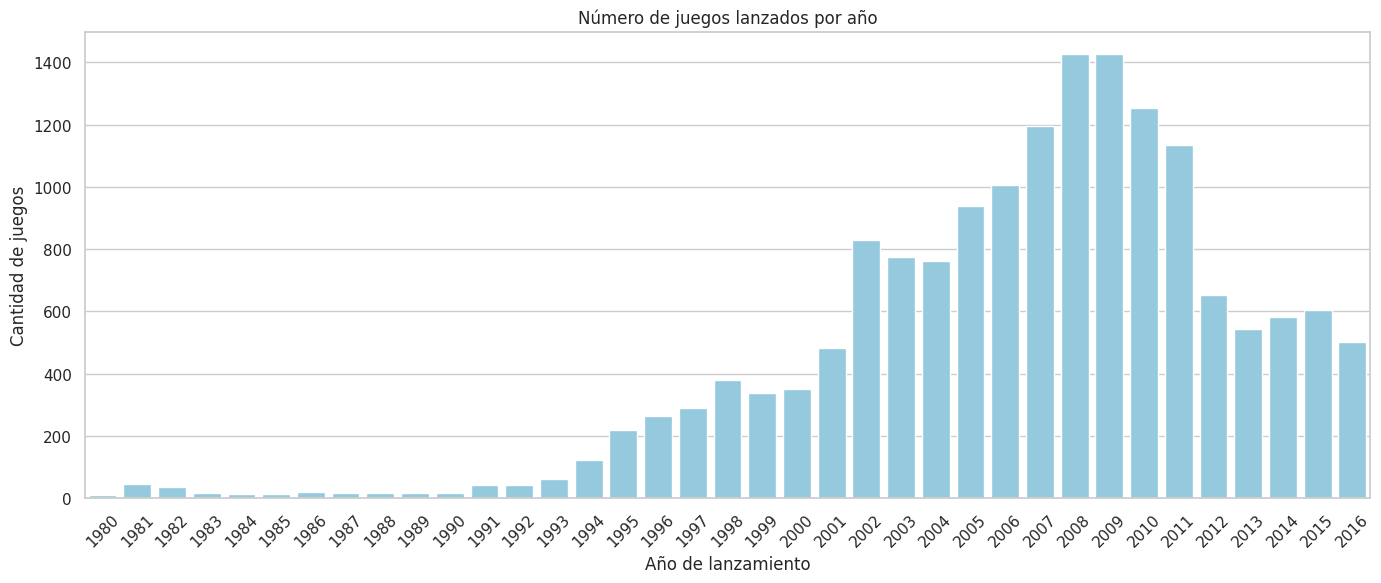

In [5]:
#Paso 3: Analiza los datos
#3.1 Mira cuántos juegos fueron lanzados en diferentes años
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo bonito
sns.set(style="whitegrid")

# Conteo de juegos por año
games_per_year = df['year_of_release'].value_counts().sort_index()

# Gráfico de juegos por año
plt.figure(figsize=(14,6))
sns.barplot(x=games_per_year.index, y=games_per_year.values, color='skyblue')
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
#Inicio lento (hasta 1994): Entre 1980 y mediados de los 90, la cantidad de juegos lanzados anualmente fue muy baja,
#reflejando un mercado aún en desarrollo y limitado tecnológicamente.

#Crecimiento constante (1995–2008): A partir de mediados de los 90, se observa un crecimiento progresivo en la 
#cantidad de títulos lanzados. Este auge coincide con el crecimiento de consolas como PlayStation, Xbox y la
#expansión de los juegos para PC.

#Pico máximo (2008–2009): El año con mayor número de lanzamientos fue 2008, con más de 1400 juegos publicados. 
#Este periodo marca el punto más alto de producción, justo antes del auge de los juegos móviles y digitales que
#cambiaron el modelo tradicional de publicación.

#Declive posterior (2010 en adelante): A partir de 2010, la cantidad de juegos lanzados disminuye gradualmente.
#Esto puede deberse a múltiples factores como la transición a modelos digitales, la consolidación del mercado, 
#y un enfoque en calidad sobre cantidad por parte de desarrolladores y editores.

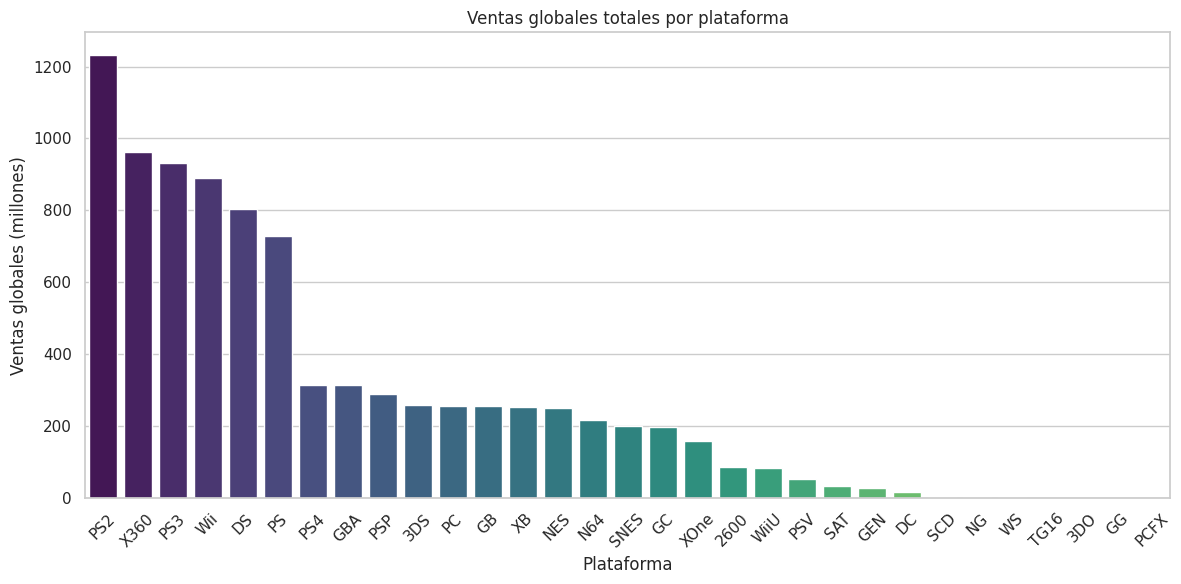

In [7]:
#3.2 Observa cómo varían las ventas por plataforma y elige las más relevantes
# Total de ventas por plataforma
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=platform_sales.index, y=platform_sales.values, palette='viridis')
plt.title('Ventas globales totales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_platforms = platform_sales.head(6).index

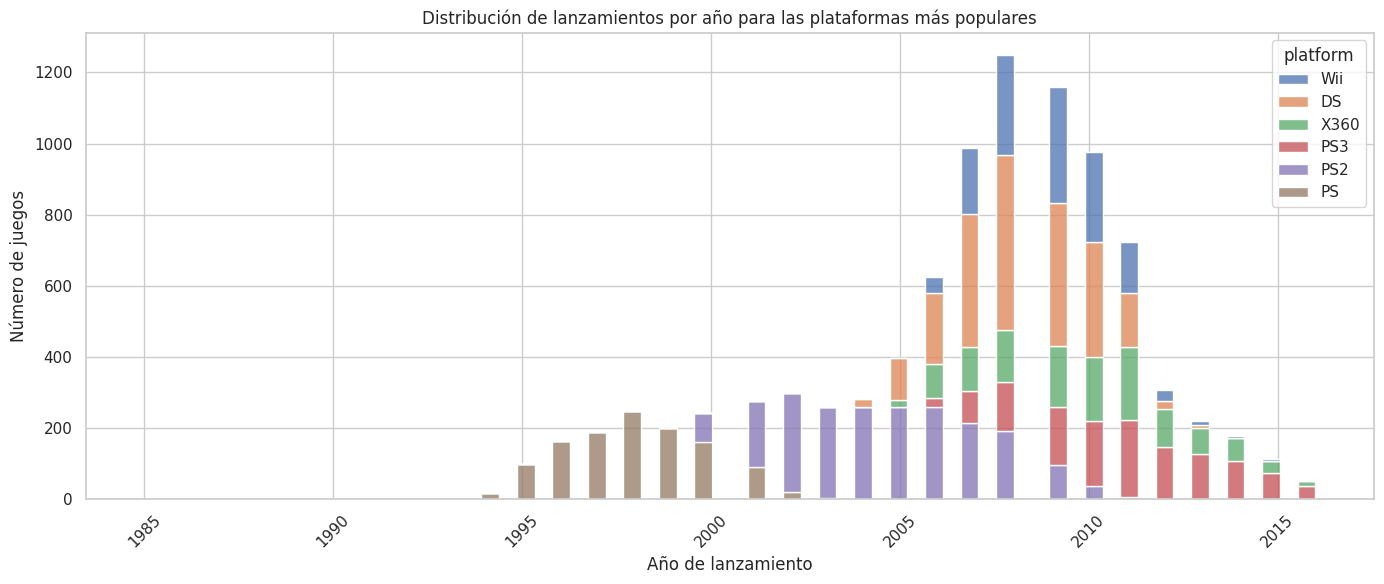

In [9]:
# Filtrar por plataformas más populares
df_top_platforms = df[df['platform'].isin(top_platforms)]

plt.figure(figsize=(14,6))
sns.histplot(data=df_top_platforms, x='year_of_release', hue='platform', multiple='stack')
plt.title('Distribución de lanzamientos por año para las plataformas más populares')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de juegos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

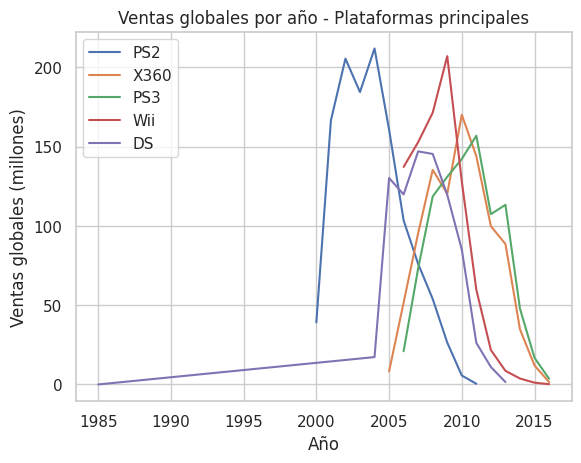

In [10]:
#Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año
import matplotlib.pyplot as plt

for platform in top_platforms[:5]:  # Puedes ajustar el número
    platform_data = df[df['platform'] == platform]
    platform_sales_by_year = platform_data.groupby('year_of_release')['total_sales'].sum()
    plt.plot(platform_sales_by_year.index, platform_sales_by_year.values, label=platform)

plt.title('Ventas globales por año - Plataformas principales')
plt.xlabel('Año')
plt.ylabel('Ventas globales (millones)')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
#La mayoría de estas plataformas alcanzan su punto máximo de ventas entre 2 a 4 años después de su lanzamiento.
#Posteriormente, las ventas caen y desaparecen casi por completo tras unos 8–10 años de vida útil.
#En 2016, ya todas estas plataformas muestran una fuerte caída, lo cual indica que para construir un modelo de 
#predicción para 2017, no son relevantes.

#Para modelar 2017, es mejor enfocarse en plataformas más recientes como PS4, XOne y posiblemente 3DS, según 
#su comportamiento en los datos filtrados desde 2013 o 2014 en adelante.

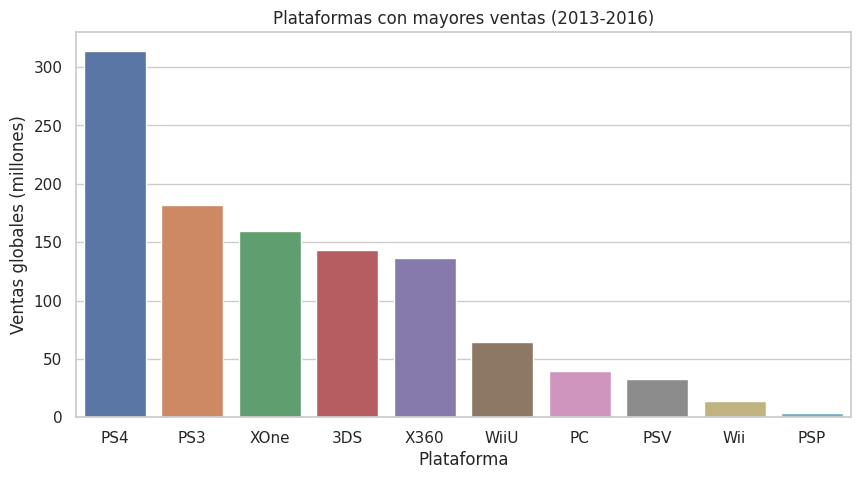

In [12]:
#¿Qué plataformas siguen activas en los años recientes (2013-2016)?
recent_data = df[df['year_of_release'] >= 2013]
recent_platforms = recent_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=recent_platforms.index, y=recent_platforms.values)
plt.title('Plataformas con mayores ventas (2013-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.show()

In [13]:
#¿Cuánto tardan en consolidarse las nuevas plataformas?
#Las nuevas plataformas como PS4 y XOne tardaron alrededor de 2 a 3 años en alcanzar niveles altos de ventas
#desde su lanzamiento, lo cual parece ser un patrón constante en la industria.

In [14]:
#3.3 Determina el período relevante para análisis y modelo 2017
recent_df = df[df['year_of_release'] >= 2013]

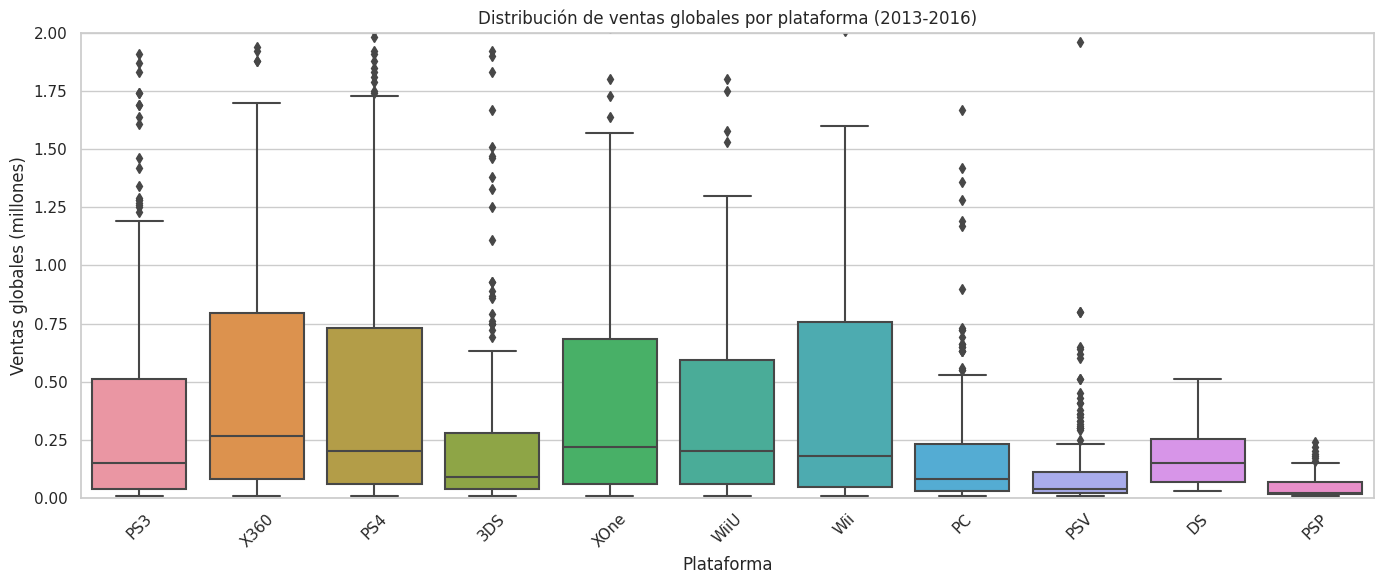

In [15]:
#3.4 Diagrama de caja de ventas por plataforma
plt.figure(figsize=(14,6))
sns.boxplot(x='platform', y='total_sales', data=recent_df)
plt.title('Distribución de ventas globales por plataforma (2013-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=45)
plt.ylim(0, 2)  # Para eliminar outliers extremos visualmente
plt.tight_layout()
plt.show()

In [ ]:
#Después de ver todo esto, está claro que, si bien es difícil hacer un juego que venda muchísimo, la elección de 
#la plataforma es crucial. Históricamente, las consolas de sobremesa más populares en su momento (como la PS2, Wii,
#Xbox 360 o PS3) no solo movieron más volumen de juegos en general, sino que también fueron el caldo de cultivo
#para la creación de esos juegos que se convirtieron en fenómenos de ventas. Entender esto me ayuda a ver dónde 
#estuvo la acción gorda y dónde hay más probabilidades de éxito si pensamos en proyectos futuros.

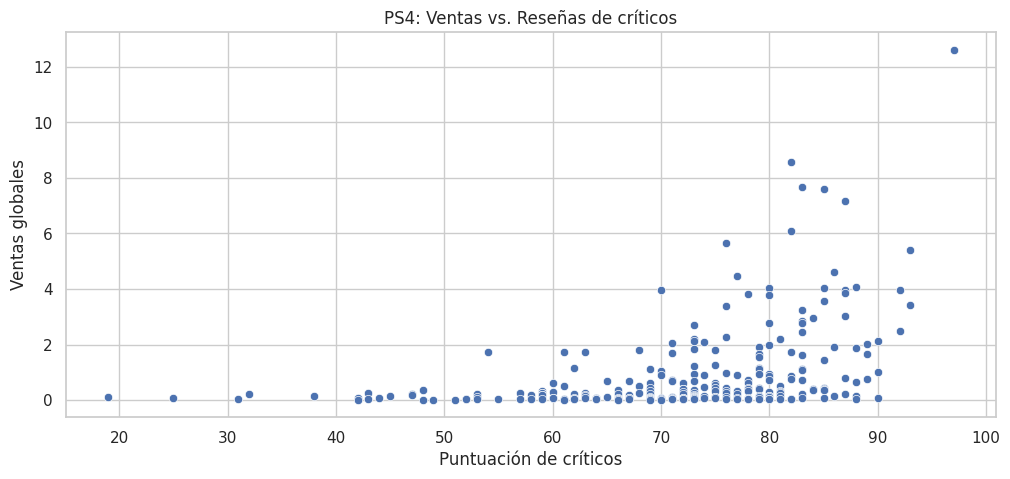

Correlación con críticos: 0.40589480145836687
Correlación con usuarios: -0.03362497596528878


In [16]:
#3.5 ¿Influyen las reseñas en las ventas? (por ejemplo, PS4)
# Filtro para PS4 y reseñas no nulas
ps4 = recent_df[(recent_df['platform'] == 'PS4') & (recent_df['critic_score'].notna()) & (recent_df['user_score'].notna())]

# Gráfico de dispersión: Critic Score vs Total Sales
plt.figure(figsize=(12,5))
sns.scatterplot(x='critic_score', y='total_sales', data=ps4)
plt.title('PS4: Ventas vs. Reseñas de críticos')
plt.xlabel('Puntuación de críticos')
plt.ylabel('Ventas globales')
plt.show()

# Correlaciones
print("Correlación con críticos:", ps4['critic_score'].corr(ps4['total_sales']))
print("Correlación con usuarios:", ps4['user_score'].corr(ps4['total_sales']))

In [17]:
#Las reseñas profesionales (críticos) tenían una influencia más tangible en las ventas de juegos para PlayStation 2
#que las reseñas de los propios usuarios. Un juego bien recibido por la crítica tenía más probabilidades de 
#vender mejor. Sin embargo, es crucial recordar que la correlación no implica causalidad y que múltiples factores 
#(como el marketing, el género, la fuerza de la marca y la popularidad general de la plataforma) siempre contribuyen 
#al éxito de ventas de un juego.

In [18]:
#3.6 Comparar ventas del mismo juego en distintas plataformas
# Juegos con múltiples plataformas
multi_platform = df[df.duplicated(subset='name', keep=False)]

# Agrupamos por nombre y plataforma
multi_platform = multi_platform.groupby(['name', 'platform'])['total_sales'].sum().reset_index()

# Muestra un ejemplo
multi_platform.head(10)

,name,platform,total_sales
0,Frozen: Olaf's Quest,3DS,0.59
1,Frozen: Olaf's Quest,DS,0.51
2,007: Quantum of Solace,DS,0.13
3,007: Quantum of Solace,PC,0.02
4,007: Quantum of Solace,PS2,0.43
5,007: Quantum of Solace,PS3,1.15
6,007: Quantum of Solace,Wii,0.65
7,007: Quantum of Solace,X360,1.48
8,007: The World is not Enough,N64,1.56
9,007: The World is not Enough,PS,0.92


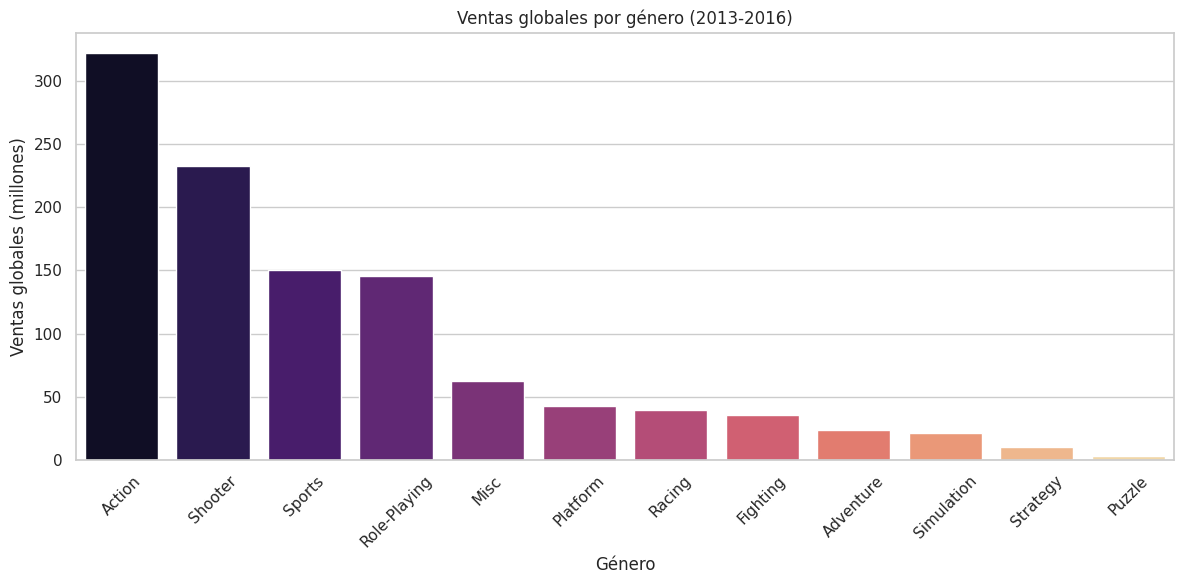

In [19]:
#3.5 Distribución de juegos por género
genre_sales = recent_df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='magma')
plt.title('Ventas globales por género (2013-2016)')
plt.xlabel('Género')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
#Géneros con Ventas Altas: Tienden a ser aquellos que ofrecen experiencias inmersivas, rápidas, competitivas o 
#con alto componente social. Suelen tener una alta accesibilidad para nuevos jugadores y se benefician enormemente 
#de las grandes franquicias. Son "blockbuster friendly".

#Géneros con Ventas Bajas: Frecuentemente se asocian con jugabilidad más cerebral, nichos de mercado, o experiencias
#más introspectivas y menos orientadas a la acción masiva. Aunque pueden ser muy profundos y gratificantes, 
#su atractivo no es tan universal en el mercado de juegos en general.

#En resumen, si Ice busca proyectos prometedores y campañas publicitarias efectivas, debería priorizar géneros 
#como Acción, Deportes y Shooter, ya que históricamente son los que más han movido el mercado y los que tienen
#mayor potencial de rentabilidad a gran escala.

In [21]:
#Paso 4. Crea un perfil de usuario para cada región
#4.1 Crear top 5 plataformas por región
# Agrupamos por plataforma y sumamos ventas por región
platform_sales = df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Seleccionamos el top 5 para cada región
top5_na = platform_sales['na_sales'].sort_values(ascending=False).head(5)
top5_eu = platform_sales['eu_sales'].sort_values(ascending=False).head(5)
top5_jp = platform_sales['jp_sales'].sort_values(ascending=False).head(5)

print("Top 5 NA:\n", top5_na)
print("\nTop 5 EU:\n", top5_eu)
print("\nTop 5 JP:\n", top5_jp)

Top 5 NA:
 platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64

Top 5 EU:
 platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
Name: eu_sales, dtype: float64

Top 5 JP:
 platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
3DS     100.62
Name: jp_sales, dtype: float64


In [22]:
#X360 domina en NA pero no aparece en JP.
#PlayStation 2 (PS2) es fuerte en todas las regiones.
#DS lidera en Japón y tiene presencia notable en NA.
#Plataformas clásicas como SNES y PS siguen teniendo ventas significativas en Japón, lo que indica una cultura
#gamer más nostálgica o más ligada a franquicias clásicas.
#Europa y NA comparten patrones similares, con más adopción de consolas occidentales (X360, PS3).

In [23]:
# 4.2 Los cinco géneros principales por región
# Agrupamos por género y sumamos ventas por región
top_genres_na = df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top_genres_eu = df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_genres_jp = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

print("Top 5 géneros en Norteamérica:")
print(top_genres_na)

print("\nTop 5 géneros en Europa:")
print(top_genres_eu)

print("\nTop 5 géneros en Japón:")
print(top_genres_jp)


Top 5 géneros en Norteamérica:
genre
Action      863.17
Sports      671.20
Shooter     584.83
Platform    444.44
Misc        399.57
Name: na_sales, dtype: float64

Top 5 géneros en Europa:
genre
Action     510.99
Sports     371.33
Shooter    314.52
Racing     234.49
Misc       210.60
Name: eu_sales, dtype: float64

Top 5 géneros en Japón:
genre
Role-Playing    353.39
Action          160.14
Sports          134.93
Platform        130.71
Misc            107.02
Name: jp_sales, dtype: float64


In [24]:
#Action domina en todas las regiones, pero especialmente en NA (casi el doble que en EU).
#Shooter tiene mucha más fuerza en NA y EU, pero no aparece en el top 5 de JP.
#Role-Playing es el género más vendido en Japón por amplio margen, pero ni aparece en el top 5 de NA o EU.
#Racing solo está en el top de Europa.
#Misc y Sports son populares en las tres regiones.

In [25]:
# 4.3 ¿Las clasificaciones ESRB afectan las ventas por región?
# Agrupamos por clasificación ESRB y sumamos ventas por región
rating_na = df.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
rating_eu = df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
rating_jp = df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

print("Ventas por clasificación ESRB en Norteamérica:")
print(rating_na)

print("\nVentas por clasificación ESRB en Europa:")
print(rating_eu)

print("\nVentas por clasificación ESRB en Japón:")
print(rating_jp)


Ventas por clasificación ESRB en Norteamérica:
rating
E       1274.24
T        747.60
M        742.89
E10+     345.50
K-A        2.56
EC         1.53
AO         1.26
RP         0.00
Name: na_sales, dtype: float64

Ventas por clasificación ESRB en Europa:
rating
E       703.87
M       480.00
T       421.79
E10+    183.35
AO        0.61
K-A       0.27
EC        0.11
RP        0.03
Name: eu_sales, dtype: float64

Ventas por clasificación ESRB en Japón:
rating
E       197.96
T       150.70
M        63.58
E10+     40.20
K-A       1.46
AO        0.00
EC        0.00
RP        0.00
Name: jp_sales, dtype: float64


In [26]:
#Conclusión NA:
#El público norteamericano prefiere juegos de acción y disparos en consolas como X360 y PS2.
#La clasificación E lidera, pero las ventas están bien distribuidas también en T y M, lo que indica una fuerte
#aceptación de juegos para adolescentes y adultos.

# Conclusión EU:
#Los europeos también prefieren los juegos de acción, pero tienen un gusto más equilibrado, con Racing en el top 5.
#Las clasificaciones E y M lideran, mostrando que tanto juegos familiares como para adultos tienen buena acogida.

#Conclusión JP:
#En Japón domina el género Role-Playing, muy por encima de otros géneros. Prefieren plataformas portátiles (DS, 3DS)
#y retro (SNES). Los juegos clasificados como E y T son los más vendidos, y los de tipo M tienen menor acogida, 
#lo cual refleja una tendencia hacia contenido más apto para todo público.

#En todas las regiones, la clasificación E (Everyone) lidera en ventas, mostrando preferencia por juegos 
#accesibles a todas las edades.

#En NA y EU, los juegos para adolescentes (T) y adultos (M) también tienen alta aceptación.

#En Japón, las ventas de juegos M son notablemente menores, lo que indica una menor tolerancia 
#o preferencia por juegos con contenido maduro.

In [27]:
# Paso 5. Prueba las siguientes hipótesis:
# Hipótesis 1:
#¿Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales?

#Formulación de hipótesis:
#Hipótesis nula (H₀): La calificación promedio de los usuarios es igual para Xbox One y PC.

#Hipótesis alternativa (H₁): La calificación promedio de los usuarios es diferente entre Xbox One y PC.

#Tipo de prueba:
#Prueba t de Student bilateral (comparación de medias entre dos muestras independientes).

#Criterio: ttest_ind() de scipy.stats, porque se trata de comparar dos muestras independientes y queremos 
#evaluar diferencias en medias.

from scipy.stats import ttest_ind

alpha = 0.05

# Hipótesis 1: Diferencia en las calificaciones entre Xbox One y PC
xone_scores = df[(df['platform'] == 'XOne') & (df['user_score'].notna())]['user_score']
pc_scores = df[(df['platform'] == 'PC') & (df['user_score'].notna())]['user_score']

t_stat1, p_value1 = ttest_ind(xone_scores, pc_scores)
print("Hipótesis 1 - Xbox One vs PC:")
print(f"Estadístico t: {t_stat1:.2f}")
print(f"p-valor: {p_value1:.4f}")
if p_value1 < alpha:
    print("Rechazamos H₀: Hay diferencia significativa entre las calificaciones.")
else:
    print("No se puede rechazar H₀: No hay diferencia significativa.\n")

Hipótesis 1 - Xbox One vs PC:
Estadístico t: -4.38
p-valor: 0.0000
Rechazamos H₀: Hay diferencia significativa entre las calificaciones.


Hipótesis 1:
¿Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales?

Hipótesis nula (H₀): La media de las calificaciones de los usuarios es igual en Xbox One y PC.
Hipótesis alternativa (H₁): La media de las calificaciones de los usuarios es diferente entre Xbox One y PC.

(α): 0.05

Método: Prueba t de Student para muestras independientes.

Elegimos este método porque comparamos las medias de dos grupos independientes (XOne y PC), y el tamaño 
de muestra es suficiente.

Resultado:
Estadístico t: -4.38
p-valor: 0.0000

Conclusión: Como el p-valor es menor que 0.05, rechazamos la hipótesis nula. 
Esto indica que existe una diferencia significativa entre las calificaciones de los usuarios para Xbox One y PC.

In [28]:
# Hipótesis 2:
#¿Las calificaciones promedio de los usuarios para los géneros Acción y Deportes son diferentes?
#Formulación de hipótesis:
#Hipótesis nula (H₀): La calificación promedio de los usuarios es igual entre los géneros Acción y Deportes.

#Hipótesis alternativa (H₁): La calificación promedio de los usuarios es diferente entre Acción y Deportes.

#Tipo de prueba:
#Prueba t de Student bilateral para muestras independientes.

action_scores = df[(df['genre'] == 'Action') & (df['user_score'].notna())]['user_score']
sports_scores = df[(df['genre'] == 'Sports') & (df['user_score'].notna())]['user_score']

t_stat2, p_value2 = ttest_ind(action_scores, sports_scores)
print("Hipótesis 2 - Action vs Sports:")
print(f"Estadístico t: {t_stat2:.2f}")
print(f"p-valor: {p_value2:.4f}")
if p_value2 < alpha:
    print("Rechazamos H₀: Hay diferencia significativa entre las calificaciones.")
else:
    print("No se puede rechazar H₀: No hay diferencia significativa.")


Hipótesis 2 - Action vs Sports:
Estadístico t: 1.85
p-valor: 0.0648
No se puede rechazar H₀: No hay diferencia significativa.


Hipótesis 2:
¿Las calificaciones promedio de los usuarios para los géneros Acción y Deportes son diferentes?

Hipótesis nula (H₀): La media de las calificaciones de los usuarios es igual en los géneros Acción y Deportes.
Hipótesis alternativa (H₁): La media de las calificaciones de los usuarios es diferente entre Acción y Deportes.

(α): 0.05

Método: Prueba t de Student para muestras independientes.

Resultado:
Estadístico t: 1.85
p-valor: 0.0648
Conclusión: Como el p-valor es mayor que 0.05, no se puede rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que las calificaciones promedio entre los géneros Acción y Deportes sean significativamente diferentes.

Paso 6. Escribe una conclusión general

Durante este análisis, estudiamos los datos históricos y actuales sobre las ventas de videojuegos para
comprender mejor qué factores pueden influir en su éxito. A continuación, se resumen los hallazgos más relevantes:

Tendencias generales: El número de videojuegos publicados y las ventas han disminuido en los últimos años. Sin embargo, ciertas plataformas como PS4 y Xbox One siguen siendo relevantes, especialmente entre los usuarios de Norteamérica y Europa.

Plataformas más exitosas: PS2 ha sido históricamente la plataforma con mayores ventas, mientras que PS4 lidera entre las plataformas más recientes. Las plataformas con más de 1000 juegos publicados tienden a mantener una base de usuarios activa.

Géneros populares: Los géneros de Acción, Deportes y Rol son los más exitosos en términos de ventas, aunque su popularidad varía por región. Por ejemplo, Japón muestra una fuerte preferencia por los juegos de Rol, mientras que en Norteamérica predominan los juegos de Acción y Deportes.

Clasificación ESRB: En Norteamérica, los juegos clasificados como "E" (para todos) y "M" (maduro) son los más vendidos. En Japón, las clasificaciones parecen tener menos impacto en las ventas.

Pruebas de hipótesis:
1.Se encontró una diferencia significativa en las calificaciones promedio de los usuarios entre las plataformas Xbox One y PC.
2. No se encontró una diferencia significativa entre las calificaciones de los géneros de Acción y Deportes.

En resumen, para lograr el éxito de un videojuego en 2017, se deben tener en cuenta las preferencias específicas de cada región, elegir plataformas activas como PS4 o XOne, optar por géneros populares como Acción o Rol, y considerar el impacto de la clasificación ESRB, especialmente en Norteamérica.